# Predicting Car Prices Using Scikit-learn's KNeighborsRegressor Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

## Reading Data

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

pd.set_option('display.max_columns',None)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
## Keeping continuous variables only
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[continuous_values_cols]
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [4]:
cars.replace('?',np.nan,inplace=True)

In [5]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars=cars.astype(float, errors='raise')

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [8]:
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
#Replacing NaN in normalized-losses columns with the column's mean value
cars['normalized-losses'].value_counts(dropna=False)

#replacing np.nan with 0 to include all values for mean calculation
cars['normalized-losses']=cars['normalized-losses'].replace(np.nan,0)
mean=cars['normalized-losses'].mean()
cars['normalized-losses']=cars['normalized-losses'].replace(0,mean)
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,97.6,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,97.6,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,97.6,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [10]:
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [11]:
# Removing all rows where price(target) is null
cars=cars[cars['price'].notnull()]

In [12]:
# Replacing missing values in horsepower column with the column's mean
cars['horsepower']=cars['horsepower'].replace(np.nan,0)
mean=cars['horsepower'].mean()
cars['horsepower']=cars['horsepower'].replace(0,mean)


In [13]:
# Replacing null values in bore, stroke, and peak-rpm columns with their respective means

cars= cars.fillna(cars.mean())
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalizing the Data

In [14]:
# Isolating target column
price= cars['price']
cars=cars.drop('price',axis=1)
#Linear Scaling/ Scaling to range
cars=(cars-cars.min())/(cars.max()-cars.min())
cars['price']=price
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.170681,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.170681,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.170681,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [15]:
def knn_train_test(training_col,target_col,df):
    #Ranodomizing and splitting df
    np.random.seed(1)
    df_random=df.iloc[np.random.permutation(len(df))]
    training_df= df_random.iloc[0:160].copy()
    testing_df= df_random.iloc[160:].copy()
    #Traing
    knn=KNeighborsRegressor()
    knn.fit(training_df[[training_col]],training_df[target_col])
    #Testing
    predictions=knn.predict(testing_df[[training_col]])
    #Validation
    mse= mean_squared_error(testing_df[target_col],predictions)
    rmse=mse**(1/2)
    return rmse
    
#Training and testing univariate model against different attributes
cols=cars.columns.tolist()
cols.remove('price')   
attributes= cols

univariate_model_performance={}
target_col='price'
for attribute in attributes:
    univariate_model_performance[attribute]=knn_train_test(attribute,target_col,cars)
univariate_rmse=pd.Series(univariate_model_performance)
univariate_rmse

normalized-losses    6204.309521
wheel-base           4623.423707
length               5763.047306
width                4247.891088
height               6763.989751
curb-weight          3540.864697
engine-size          3110.312522
bore                 7313.951584
stroke               7127.527363
compression-rate     5783.940036
horsepower           4958.954003
peak-rpm             7230.601944
city-mpg             3782.590091
highway-mpg          3896.828560
dtype: float64

In [16]:
# Hyperparameter Optimization
def knn_train_test(training_col,target_col,df,k):
    #Ranodomizing and splitting df
    np.random.seed(1)
    df_random=df.iloc[np.random.permutation(len(df))]
    training_df= df_random.iloc[0:160].copy()
    testing_df= df_random.iloc[160:].copy()
    #Traing
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_df[[training_col]],training_df[target_col])
    #Testing
    predictions=knn.predict(testing_df[[training_col]])
    #Validation
    mse= mean_squared_error(testing_df[target_col],predictions)
    rmse=mse**(1/2)
    return rmse
    
# Training and testing univariate model against
#different attributes and hyperparameters

cols=cars.columns.tolist()
cols.remove('price')   

attributes= cols
target_col='price'
k_vals=[1,3,5,7,9]
univariate_models_performance={attribute:([0]*len(k_vals)) for attribute in attributes}
for attribute in attributes:
  for index,k in list(enumerate(k_vals)):
    univariate_models_performance[attribute][index]=knn_train_test(attribute,target_col,cars,k)
univariate_models_performance
univariate_rmses=pd.DataFrame(univariate_models_performance)
univariate_rmses['k_neighbors']=[1,3,5,7,9]
univariate_rmses

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,k_neighbors
0,10155.463701,2625.150049,5332.887341,6201.921067,7970.734720,4105.983617,3958.731054,5319.699260,7468.335115,6297.067876,4090.134809,9370.591980,5169.871329,4065.007707,1
1,6418.137717,3814.397220,5846.691087,4429.131872,7008.742987,3867.285837,3363.579102,8046.254140,7616.796961,5641.061720,4697.235494,8838.667159,3851.071281,4059.375974,3
2,6204.309521,4623.423707,5763.047306,4247.891088,6763.989751,3540.864697,3110.312522,7313.951584,7127.527363,5783.940036,4958.954003,7230.601944,3782.590091,3896.828560,5
3,6199.154717,4958.316311,5147.901358,4192.075241,6989.927720,3648.868075,3144.013951,7346.698994,7168.186974,5925.564956,5032.603617,7137.771608,4175.118486,4287.032137,7
4,6332.688411,4943.441991,4491.438246,4059.642049,7148.162090,3899.023693,3073.082952,7491.975116,7625.036399,6152.086349,5034.195280,7500.073757,4190.026235,4510.689621,9


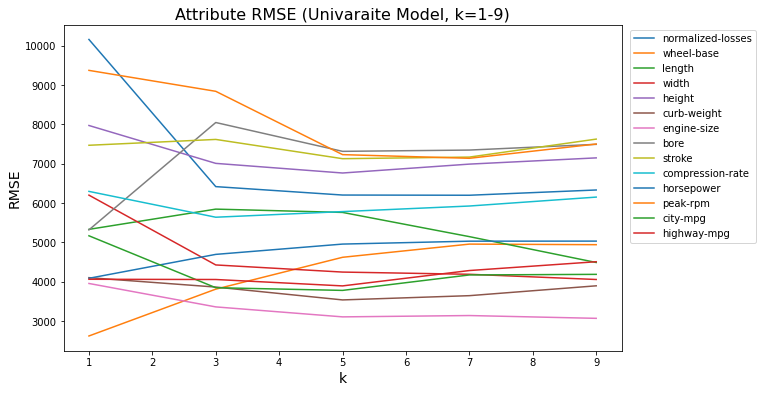

In [17]:
# Assessing Performance of univariate model for different atrributes at different hyperparameters
plt.figure(figsize=(10,6)) 
for attribute in attributes:
  x=univariate_rmses['k_neighbors']
  y=univariate_rmses[attribute]
  plt.plot(x,y,label=attribute)

plt.ylabel('RMSE',size=14)
plt.xlabel('k',size=14)  
plt.title('Attribute RMSE (Univaraite Model, k=1-9)',size=16)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()


In [18]:
# Average RMSE for different attributes for 5 hyperparameters
avg_rmse=pd.Series(univariate_rmses.drop('k_neighbors',axis=1).mean().sort_values())
avg_rmse

engine-size          3329.943916
curb-weight          3812.405184
highway-mpg          4163.786800
wheel-base           4192.945856
city-mpg             4233.735484
width                4626.132264
horsepower           4762.624641
length               5316.393068
compression-rate     5959.944188
normalized-losses    7061.950813
bore                 7103.715819
height               7176.311454
stroke               7401.176562
peak-rpm             8015.541290
dtype: float64

## Multivariate Model

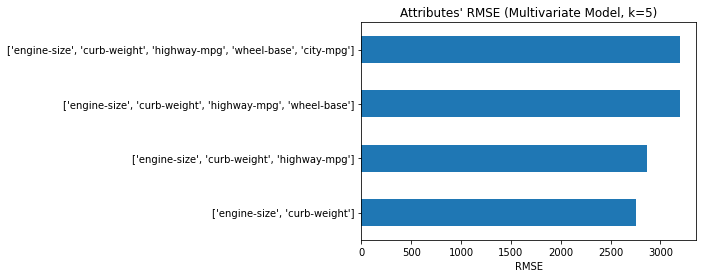

In [19]:
def knn_train_test(training_cols,target_col,df):
    #Ranodomizing and splitting df
    np.random.seed(1)
    df_random=df.iloc[np.random.permutation(len(df))]
    training_df= df_random.iloc[0:160].copy()
    testing_df= df_random.iloc[160:].copy()
    #Traing
    knn=KNeighborsRegressor()
    knn.fit(training_df[training_cols],training_df[target_col])
    #Testing
    predictions=knn.predict(testing_df[training_cols])
    #Validation
    mse= mean_squared_error(testing_df[target_col],predictions)
    rmse=mse**(1/2)
    return rmse

#Using combinations of best performing attributes in univariate model to find best multilateral model
cols=avg_rmse.index[:5]
multivariate_rmses_dic={}
for i in range(4):
  training_cols=cols[:(i+2)].tolist()
  target_col='price'
  multivariate_rmses=knn_train_test(training_cols, target_col,cars)
  multivariate_rmses_dic['{} attributes'.format(i+2)]= multivariate_rmses

#Plotting RMSEs of multivariate model 
pd.Series(multivariate_rmses_dic).plot.barh()
plt.yticks([0,1,2,3],labels=[cols[:(i+2)].tolist() for i in range(4)])
plt.xlabel('RMSE')
plt.title('Attributes\' RMSE (Multivariate Model, k=5)')
plt.show()

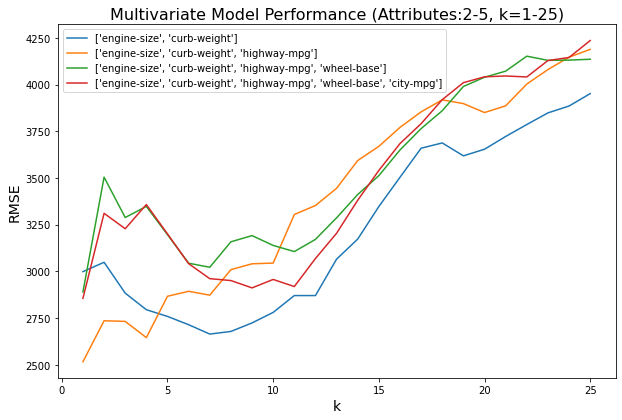

In [20]:
# Hyperparameters Optimization
def knn_train_test(training_cols,target_col,df,k):
    #Ranodomizing and splitting df
    np.random.seed(1)
    df_random=df.iloc[np.random.permutation(len(df))]
    training_df= df_random.iloc[0:160].copy()
    testing_df= df_random.iloc[160:].copy()
    #Traing
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_df[training_cols],training_df[target_col])
    #Testing
    predictions=knn.predict(testing_df[training_cols])
    #Validation
    mse= mean_squared_error(testing_df[target_col],predictions)
    rmse=mse**(1/2)
    return rmse

#Using top top 4 combinations of multivariate model for tuning hyperparameter

cols=avg_rmse.index[:5]
multivariate_rmses_dic_k={}
k_vals=[i for i in range(1,26)]
plt.figure(figsize=(10,6.5))
for i in range(4):
  training_cols=cols[:(i+2)].tolist()
  target_col='price'
  multivariate_rmses=[]
  for k in k_vals:
    rmse=knn_train_test(training_cols, target_col,cars,k)
    multivariate_rmses.append(rmse)
    multivariate_rmses_dic_k['{} attributes|k={}'.format(i+2,k)]=rmse
  plt.plot(k_vals,multivariate_rmses,label=training_cols)
  
plt.legend()
# plt.xticks([1,5,10,15,20,25])
plt.xlabel('k',size=14)
plt.ylabel('RMSE',size=14)
plt.title('Multivariate Model Performance (Attributes:2-5, k=1-25)',size=16)
plt.show()

In [21]:
rmses_multivariate_diff_k=pd.Series(multivariate_rmses_dic_k)
k=1
for i in range(25,125,25):
  min=rmses_multivariate_diff_k[i-25:i].min()
  print('Min RMSE for combination#{} across 25 hyperparameters is {}'.format(k,min))
  k+=1

Min RMSE for combination#1 across 25 hyperparameters is 2664.414525848972
Min RMSE for combination#2 across 25 hyperparameters is 2516.31863312551
Min RMSE for combination#3 across 25 hyperparameters is 2889.6970176228747
Min RMSE for combination#4 across 25 hyperparameters is 2855.662940416514
